## Info

## Importing libraries

In [231]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from matplotlib import colors
import seaborn as sns
import plotly_express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN

import missingno as msno

#Use case
from PIL import Image
import glob
import numpy as np

## AULA 01 - MODELOS DE CLASSIFICAÇÃO

### Reading data

In [104]:
dados = pd.read_excel('../data/gaf_esp.xlsx')
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


### Exploring data

In [105]:
dados.shape

(100, 3)

In [106]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Comprimento do Abdômen,100.0,4.9362,3.343806,0.50,1.6925,4.5,8.2,10.0
Comprimento das Antenas,100.0,5.3824,2.296001,0.89,3.7750,5.5,7.0,9.7


In [107]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

### Visualizing data

Scatter

<AxesSubplot:xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

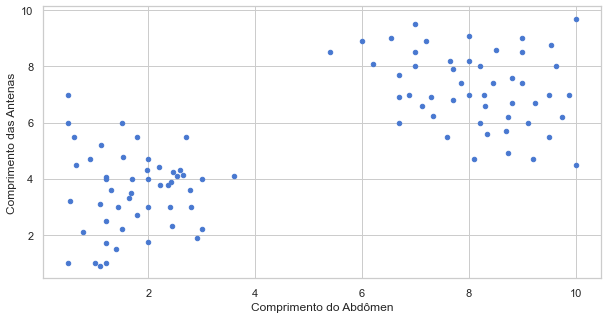

In [108]:
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

### Spliting training and testing data

In [109]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = dados['Espécie']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Evaluating "stratify"

In [111]:
list(y_train).count('Gafanhoto'), list(y_train).count('Esperança')

(40, 40)

### Creating and training model
KNeighborsClassifier

In [112]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [113]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting

In [114]:
#TEST
modelo_classificador.predict([[8, 6]])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



array(['Esperança'], dtype=object)

### Evaluating model

In [115]:
y_predito = modelo_classificador.predict(x_test)

In [116]:
accuracy_score(y_true = y_test, y_pred = y_predito)

1.0

Assertividade de 100% é suspeita, pode sinalizar Overfitting e etc.

***

## AULA 02 - KNN, SVM

### Reading data

In [117]:
dados = pd.read_excel('../data/Recrutamento.xlsx')
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


### Exploring data

In [118]:
dados.shape

(215, 15)

Valores unicos do status

In [119]:
set(dados.status)

{'No', 'Yes'}

In [120]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [121]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### Checking null values

<AxesSubplot:>

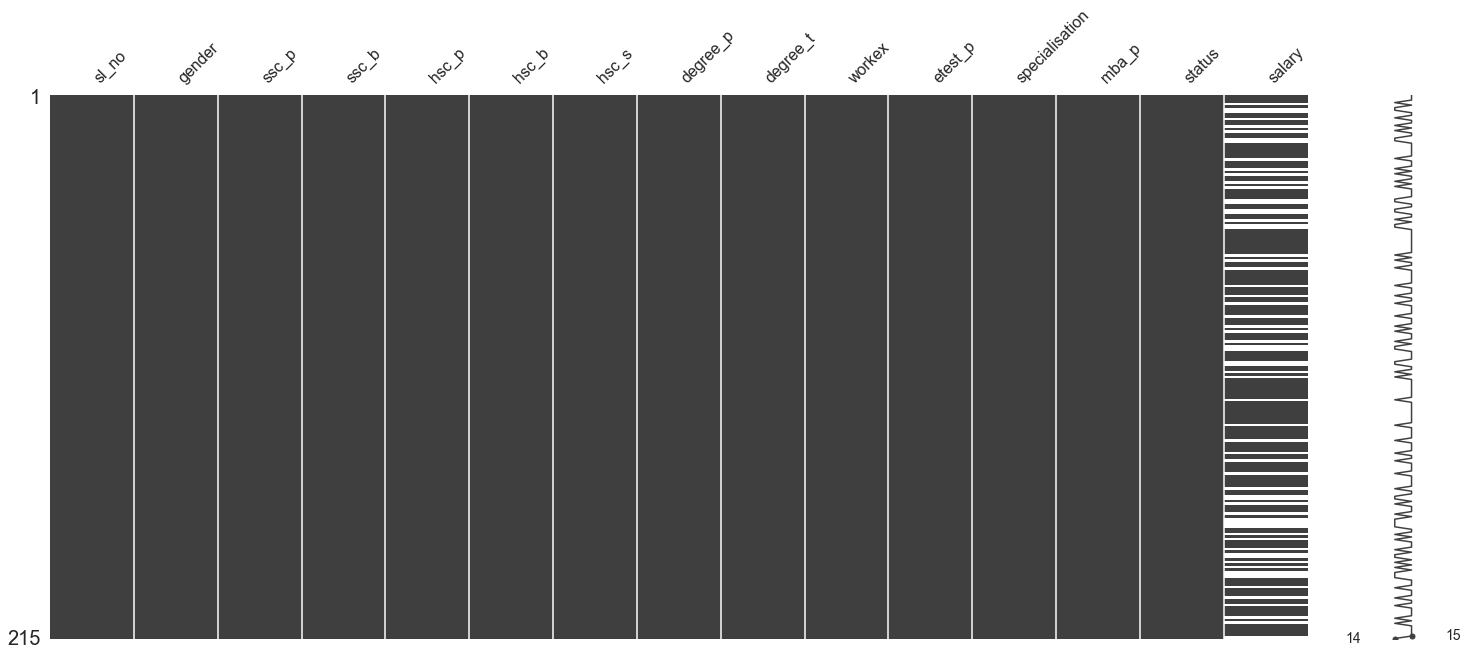

In [122]:
msno.matrix(dados)

In [123]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<AxesSubplot:xlabel='status', ylabel='salary'>

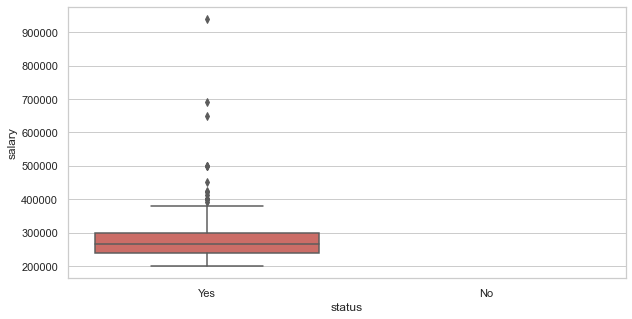

In [124]:
sns.boxplot(x='status', y='salary', data=dados, palette='hls')

#### Handling null values

In [125]:
dados['salary'].fillna(value=0, inplace=True)

In [126]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### Checking data distribution
- boxplot
- histogram

##### HSC_P

<AxesSubplot:xlabel='hsc_p'>

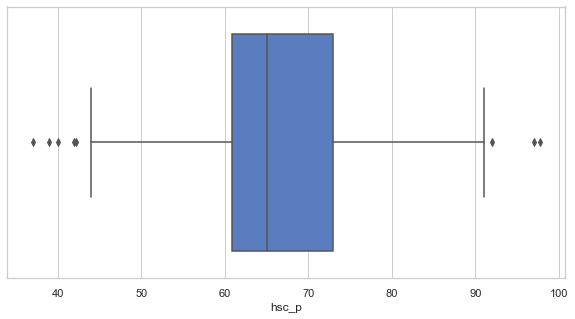

In [127]:
sns.boxplot(x=dados['hsc_p'])

<AxesSubplot:xlabel='hsc_p', ylabel='Count'>

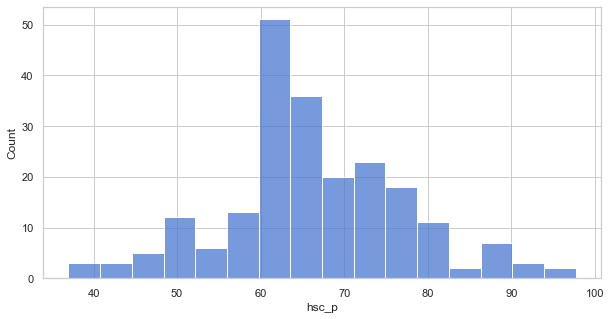

In [128]:
sns.histplot(data=dados, x='hsc_p')

Existem outliers mas não são tão representativos em termos de ocorrências, podemos ver no histograma que a frequência desses outliers é baixa.

Em termos gerais, disitruição "normal"

##### DEGREE_P

<AxesSubplot:xlabel='degree_p'>

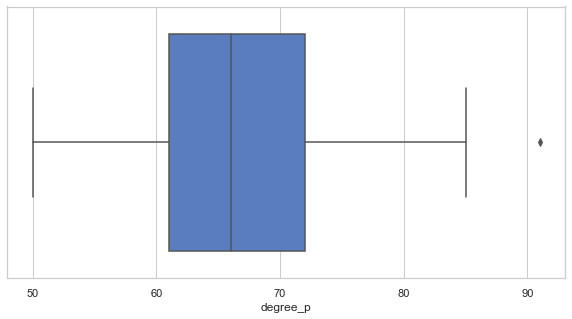

In [129]:
sns.boxplot(x=dados['degree_p'])

<AxesSubplot:xlabel='degree_p', ylabel='Count'>

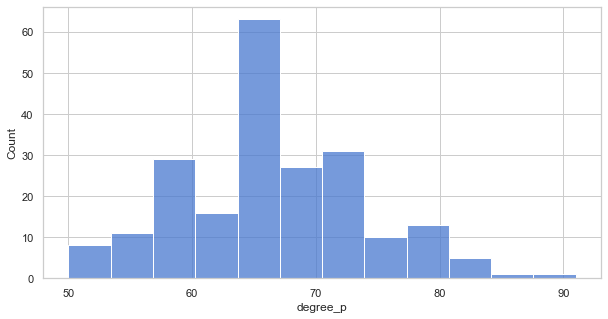

In [130]:
sns.histplot(data=dados, x='degree_p')

Em termos gerais, distribuição "normal"

##### MBA_P

<AxesSubplot:xlabel='mba_p'>

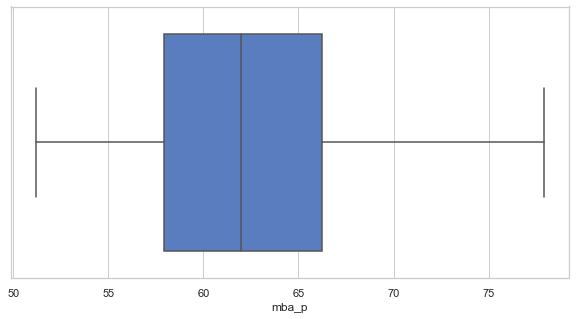

In [131]:
sns.boxplot(x=dados['mba_p'])

<AxesSubplot:xlabel='mba_p', ylabel='Count'>

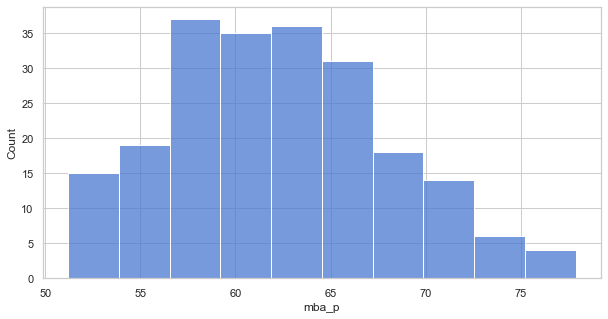

In [132]:
sns.histplot(data=dados, x='mba_p')

Em termos gerais, distribuição normal

##### SALARY

<AxesSubplot:xlabel='salary'>

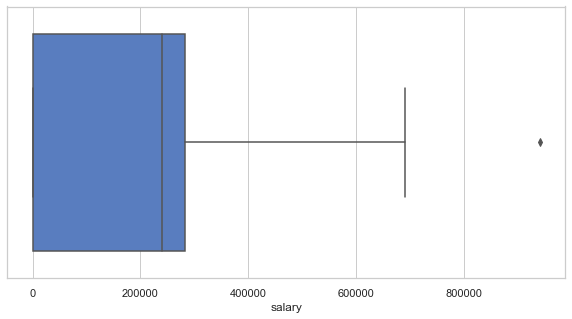

In [133]:
sns.boxplot(x=dados['salary'])

<AxesSubplot:xlabel='salary', ylabel='Count'>

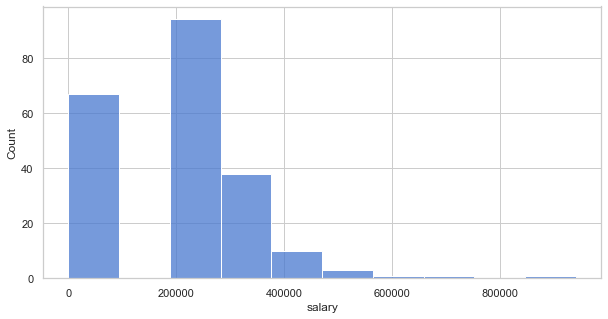

In [134]:
sns.histplot(data=dados, x='salary')

- Distribuição bem impacatada, distribuição um pouco fora da "normalidade"
- Assimétrica para esquerda

### Evaluating if candidates have more probability to get the job

#### Swarm

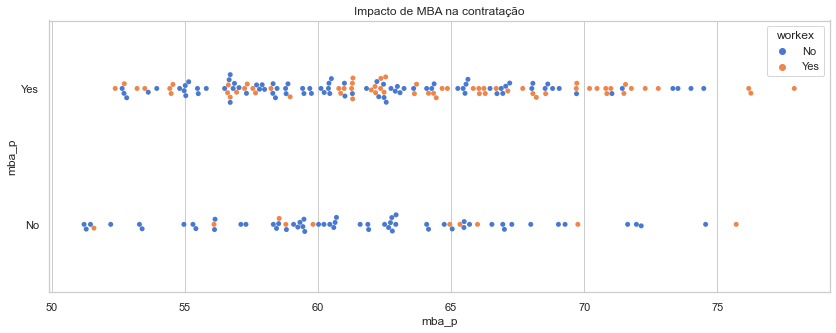

In [135]:
plt.figure(figsize=(14, 5))
sns.set_theme(style='whitegrid', palette='muted')
ax = sns.swarmplot(data=dados, x='mba_p', y='status', hue='workex')
ax.set(ylabel='mba_p')
plt.title('Impacto de MBA na contratação')
plt.show()

Variavel **mba** tem um impacto consideravel na contratação, vemos que a maioria das pessoas com especialização foram contratadas

#### Violin

In [136]:
px.violin(dados, y='salary', x='specialisation', color='gender', box=True, points='all')

### Analysing data correlation and identifying potential features

<AxesSubplot:>

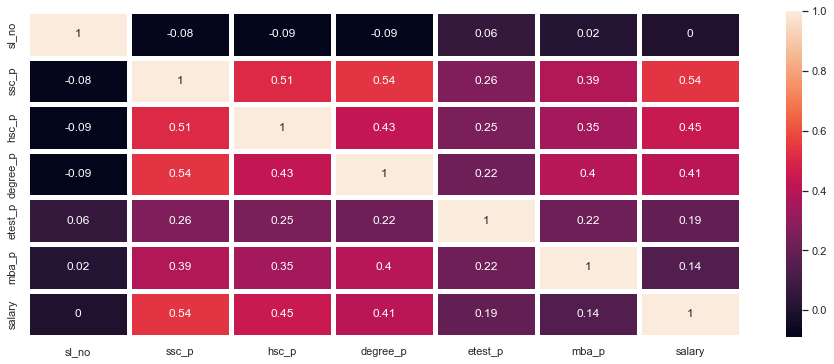

In [137]:
correlation_matriz = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(16, 6))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

Algumas variaveis categoricas estão como texto, precisamos arrumar.

### Formatting categorical features to numeric
- Label Encoder

In [138]:
colunas = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()

for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])

In [139]:
dados.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0


In [140]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

In [141]:
dados_dummy.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0


Removing datas that was normalized with dummies

In [142]:
dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [143]:
dados_dummy.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0


### Checking heatmap correlation chart but now with new variavles (the ones with label encoder)

<AxesSubplot:>

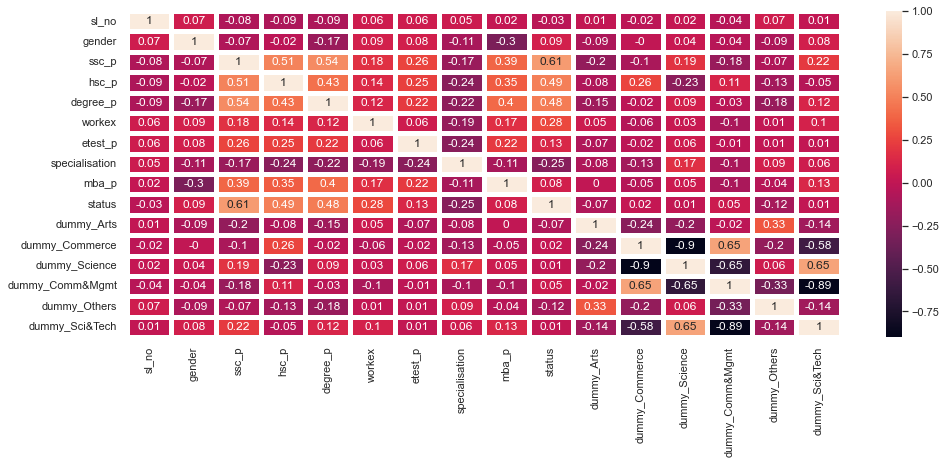

In [144]:
correlation_matriz = dados_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(16, 6))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

### Creating KNN model

In [145]:
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados_dummy['status']

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

#### Normalizing features scalling

In [147]:
x.head(3)

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80


In [148]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

#### Analyzing model mean error for parameter K (vizinhos)

In [149]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    #predicting
    pred_i = knn.predict(x_test_escalonado)
    #metrics
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro médio')

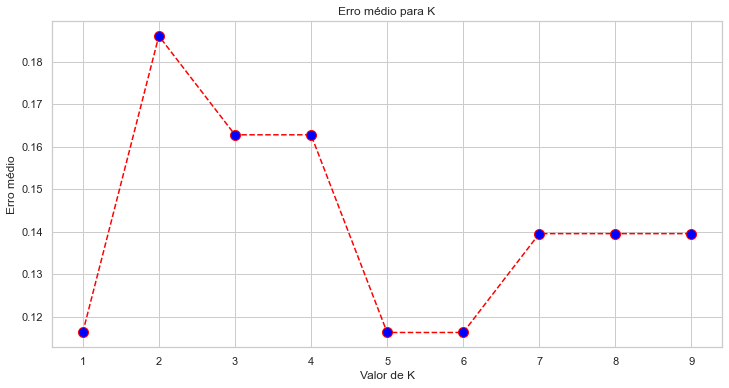

In [150]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

- valores 5 e 6 performaram melhor, não é interessante colocar o 1 pois o modelo trabalha com "vizinhoS" e não "vizinhO" (singular).
- dos dois valores é mais viável ficar com o valor 5 pois é impar, assim evitando empates

### KNN Model improved
- scalled
- encoded

In [151]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)
modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

#### Evaluating model

In [152]:
print(accuracy_score(y_test, y_predito))

0.8837209302325582


Performance boa, aceitável

### Creating SVM model

In [153]:
svm = Pipeline(
    [
        ('linear_svc', LinearSVC(C=1))
    ]
)

In [154]:
svm.fit(x_train_escalonado, y_train)

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [155]:
y_predito_svm = svm.predict(x_test_escalonado)

#### Evaluating SVM

In [156]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


## AULA 03 - KMEANS e DBSCAN

### Reading data

In [157]:
dados = pd.read_csv('../data/mall.csv', sep=',')
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Limpeza dos dados

In [158]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Análise exploratório dos dados

In [159]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [160]:
dados['Annual Income (k$)'].median()

61.5

#### Analisando a distribuição

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

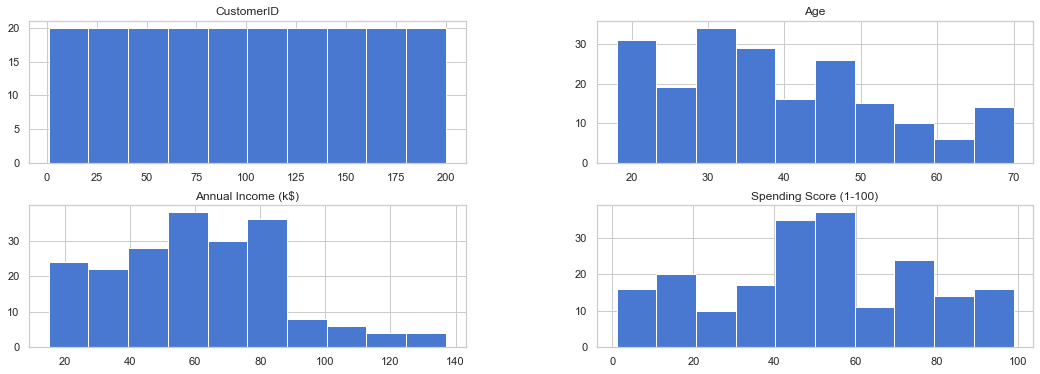

In [161]:
dados.hist(figsize=(18,6))

#### Correlação entre variáveis

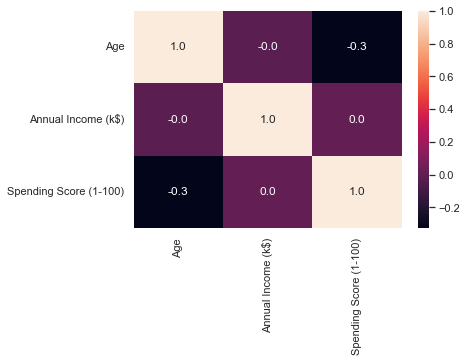

In [162]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'), annot=True, fmt='.1f');

#### Proporção de generos

In [163]:
dados['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### Cruzando variavel de genero com todas as outras variaveis

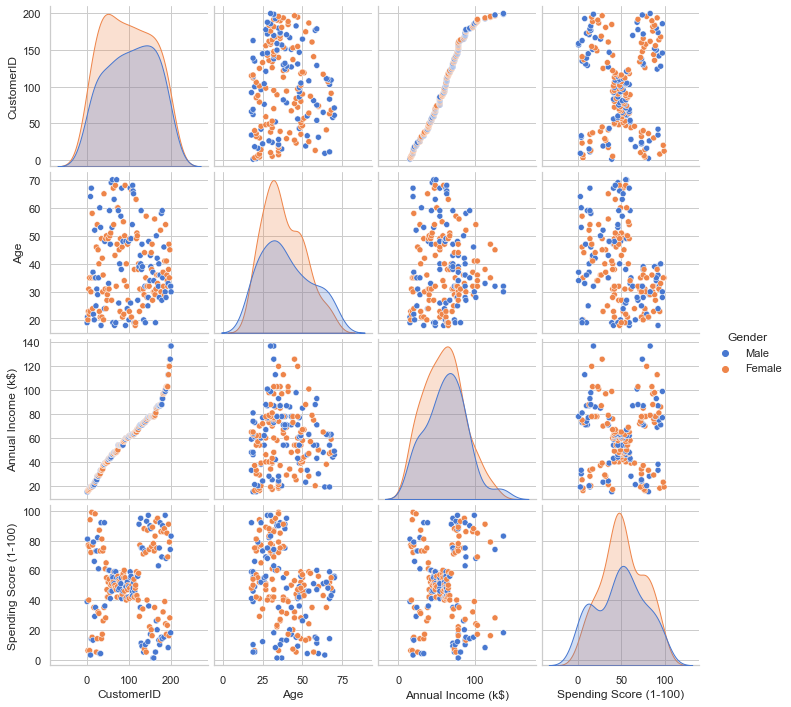

In [164]:
sns.pairplot(dados, hue='Gender')
plt.show()

Grafico Spending Score x Annual Income parece que tem grupos bem definidos na nuvem, nos proximos passos vamos explorar isso.

### Feature scalling
Validando se feature scalling faz diferença ou não (Feature engineering)

In [175]:
scaler = StandardScaler() 
#scaler = MinMaxScaler() 
scaler.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

StandardScaler()

In [176]:
dados_Escalonados = scaler.transform(dados[['Annual Income (k$)','Spending Score (1-100)']])
dados_Escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Criando os agrupamentos

#### Modelo K-Means
- sensível a outliers

##### Sem feature scalling

In [177]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



##### Com feature scalling

In [178]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_Escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_Escalonados)

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [179]:
dados_Escalonados = pd.DataFrame(dados_Escalonados, columns = ['Annual Income (k$)','Spending Score (1-100)'])
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [180]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonado
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,0


In [181]:
dados['Grupos'] = kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


##### Analisando previsão e centroids

In [182]:
pd.Series(kmeans_labels).value_counts()

3    81
2    35
1    28
5    23
0    22
4    11
dtype: int64

In [183]:
centroides #espaço tridimensional (salário e score de gasto)


array([[ 25.72727273,  79.36363636],
       [ 78.03571429,  81.89285714],
       [ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 26.30434783,  20.91304348]])

##### Cluster com feature scalling

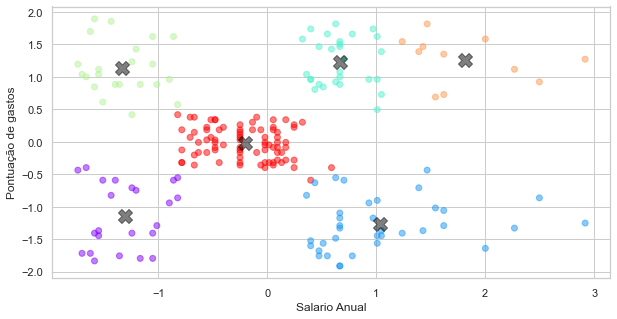

In [184]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

##### Cluster sem feature scalling

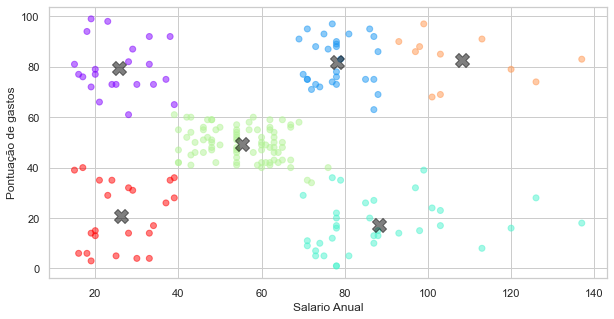

In [188]:
# PONTOS
plt.scatter(dados[['Annual Income (k$)']], dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# CENTROIDS
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

##### Metódo "COTOVELO" - Escolhendo o melhor número de clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\refelipe\AppDat

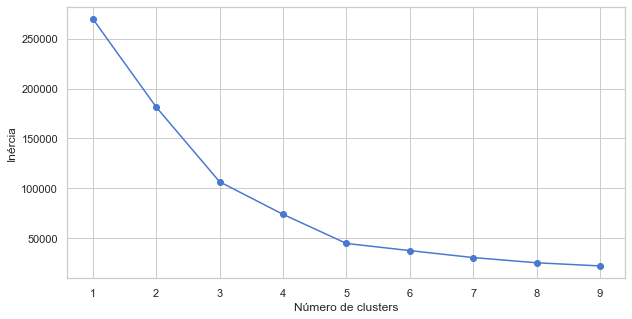

In [191]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_) #calculo do erro do k-mens (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

De acordo com o metódo de cotovelo, o número mais viável de clusters seria o 5, pois é o que tem o menor erro da soma quadrática.
Nesse método os extremos não fazem sentido, 1 e 9 por exemplo.
Sempre é mais viável pegar quando a curva começa a "estabilizar", nesse caso 5.

##### Média de idade dos grupos

In [193]:
dados.groupby('Grupos')['Age'].mean()

Grupos
0    25.272727
1    32.785714
2    41.114286
3    42.716049
4    32.454545
5    45.217391
Name: Age, dtype: float64

##### Média de renda anual dos grupos

In [198]:
dados.groupby('Grupos')['Annual Income (k$)'].mean()

Grupos
0     25.727273
1     78.035714
2     88.200000
3     55.296296
4    108.181818
5     26.304348
Name: Annual Income (k$), dtype: float64

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [200]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



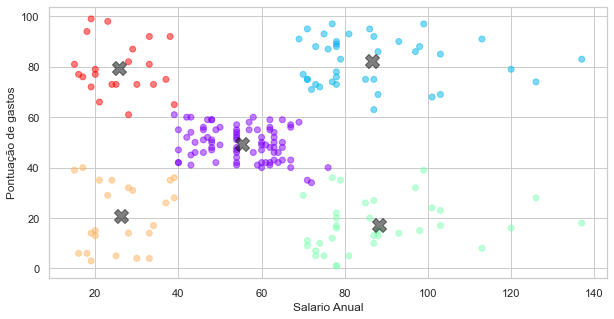

In [201]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [210]:
dados_grupo_1 = dados[dados['Grupos'] == 1]
print('Grupo 1:\n Média: {}\n'.format(dados_grupo_1['Annual Income (k$)'].mean()))

dados_grupo_2 = dados[dados['Grupos'] == 2]
print('Grupo 2:\n Média: {}\n'.format(dados_grupo_2['Annual Income (k$)'].mean()))

dados_grupo_3 = dados[dados['Grupos'] == 3]
print('Grupo 3:\n Média: {}\n'.format(dados_grupo_3['Annual Income (k$)'].mean()))

dados_grupo_4 = dados[dados['Grupos'] == 4]
print('Grupo 4:\n Média: {}\n'.format(dados_grupo_4['Annual Income (k$)'].mean()))

Grupo 1:
 Média: 78.03571428571429

Grupo 2:
 Média: 88.2

Grupo 3:
 Média: 55.2962962962963

Grupo 4:
 Média: 108.18181818181819



Com esse resultado é possível extender a análise e coemçar a entender melhor cada perfil (cada grupo) através de estatisticas especfiicas para cada grupo e etc. E assim no final traçar perfil de grupo alvo.

#### Modelo DBSCAN
- funciona melhor com outliers
- não identifica grupos dentro de grupos

In [214]:
# CRIANDO MODELO
dbscan = DBSCAN(eps=10, min_samples=8)

# AJUSTANDO OS DADOS
dbscan.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

# PEGANDO AS LABELS IDENTIFICADADS
dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

##### Labels com -1 foram classificados como outliers
- Roxos no próximo gráfico

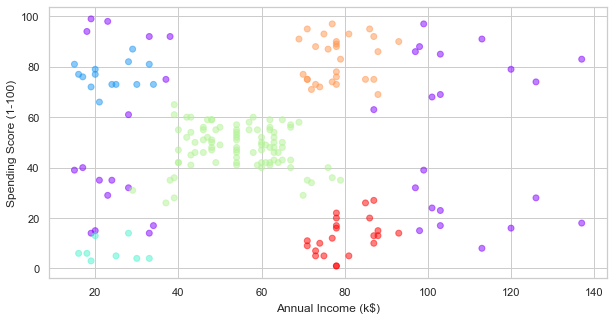

In [216]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

##### Visualizando sem os outliers

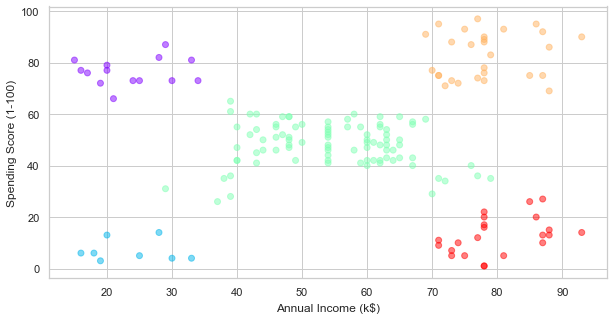

In [217]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Checando a quantidade de valores que foram classificados como Outliers:

In [221]:
list(mascara).count(False)

38

#### Como validar uma clusterização?
Temos dois tipos:

Interna: Quanto bom foi o meu agrupamento?
Externa: Como parecido estão os meus dois algoritmos comparados?
Avaliando o Desempenho dos Algoritmos
Tipo Externo:
(a) Usando o Adjusted Rand Index

Compara o desempenho quando forem fornecidos datasets com labels geradas de forma aleatória. Quando essas labels estão muito diferente, o valor se aproxima de 0, o que sugere um resultado negativo, ou seja, clusters não próximos.

Comparação entre K-Means e DBSCAN:

In [225]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

##### Tipo interno:
(b) Avaliando a métrica de Silhouette

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

KMEANS:

In [226]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)


0.553931997444648

DBSCAN:



In [227]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)


0.36328873885121793

***

#### Use case - Segmentação de imagens
Cancer de mama

Segmentação de Imagens de Câncer de Mama
Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A Segmentação de Imagem envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [232]:
# Carregando as imagens
img_G = mpimg.imread('../data/mdb001.pgm') # Tipo G
img_D = mpimg.imread('../data/mdb003.pgm') # Tipo D
img_F = mpimg.imread('../data/mdb005.pgm') # Tipo F

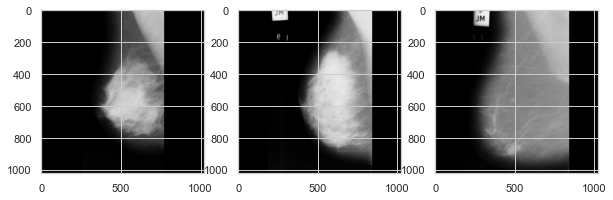

In [233]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [234]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)
    
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    
    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)

In [235]:

clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters) # Tipo G
img_D_segmentada = filtro_kmeans(img_D, clusters) # Tipo D
img_F_segmentada = filtro_kmeans(img_F, clusters) # Tipo F

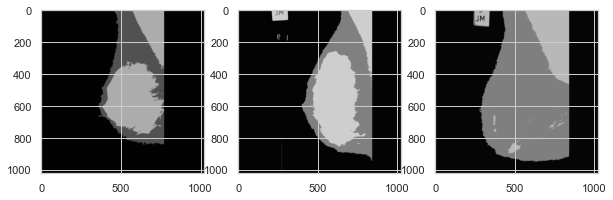

In [236]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()